In [1]:
import cv2
import matplotlib.pyplot as plt

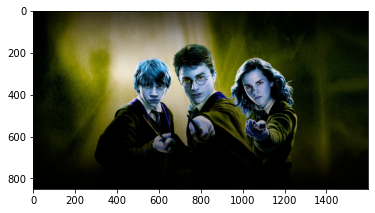

In [2]:
img = cv2.imread('G:/New folder/harry.jpg')
cv2.imshow('Harry', img)

# covetrt image into gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)
cv2.waitKey(0)
plt.imshow(img)


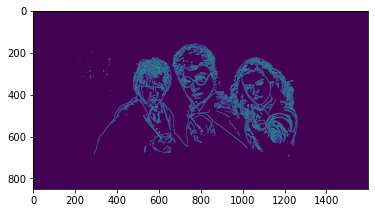

In [3]:
# Now we are going to detect edges of the image using canny edge detector
# canny(img, threshold1, threshold2, edges = None, apertureSize = None, L2gradient = None)

canny = cv2.Canny(img, 125, 175)
cv2.imshow('Canny', canny)
cv2.waitKey(0)
plt.imshow(canny)

In [4]:
# Now we will find contours by using find contour methods
'''findContours(img, mode, method)                                         
    mode---> in which found contours
        cv2.RETR_TREE----> if we want heirarchical contours
        cv2.RETR_EXTERNAL----> if we want only external contours
        cv2.RETR_LIST----> If we want all the contours
    method ----> is contour approximation
        cv2.CHAIN_APPROX_NONE-----> It does nothing, it returns all contours
        cv2.CHAIN_APPROX_SIMPLE----> It compresses all contours that are returned
            eg. If u have line in image, and if u use cv2.CHAIN_APPROX_NONE--->u get all contours coordinate of that line
                  if u use cv2.CHAIN_APPROX_SIMPLE---> it takes all pts of line, compresses it into 2 end point only
        
contours---> python list of all coordinates of the contours found in the image
heirarchies---> if u have rectangle, and inside of rectangle there is square, and inside of squre there is circle then
                openCV uses heirarchy to find these contours
                
                
'''
contours, heirarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

1679


In [5]:
# here in this image we found 1679 contours

In [6]:
contours, heirarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

1679


219


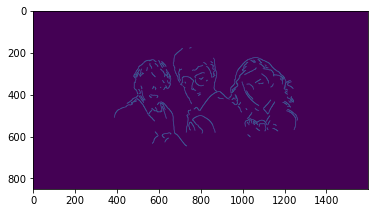

In [7]:
# Now we are going to blur the image before finding the contours
blur = cv2.GaussianBlur(img, (9,9), cv2.BORDER_DEFAULT)
cv2.imshow('Blur', blur)

canny = cv2.Canny(blur, 125, 175)
cv2.imshow('Canny', canny)

contours, heirarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

cv2.waitKey(0)
plt.imshow(canny)

In [8]:
# Here the significant amount of edges are reduced by blurring the image

# Another way of finding contours using another function  i.e. Threshold

1079


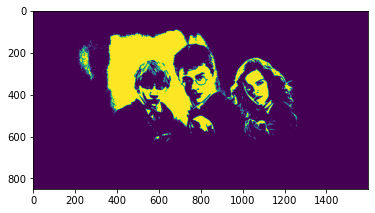

In [9]:
# threshold(src, thresh val, maxval, type, dst = None)


ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY) 
cv2.imshow('Thresh', thresh)
# Thresholding looks at image and binarise the image
# if the pixel intensity is below 125 then it set to zero or black
# if intensity is above 125 then set it to white or 255

# and in findContours method we pass this thresh value in place of canny

contours, heirarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

cv2.waitKey(0)
plt.imshow(thresh)

# How to draw contours on blank image

In [10]:
import numpy as np

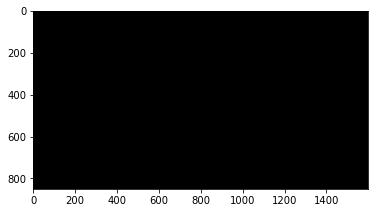

In [11]:
# to draw blank image
blank = np.zeros(img.shape, dtype = 'uint8')
cv2.imshow('Blank', blank)
cv2.waitKey(0)
plt.imshow(blank)

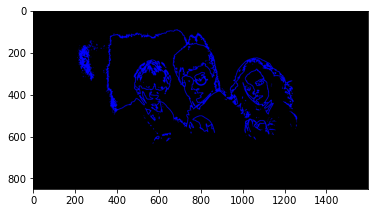

In [12]:
# Now we will draw the found contours on this blank image by drawContours method
'''
drawContours(img, contours, contoursIdx, color, thickness = None, lineType = None,heirarchy=None,maxLevel=None,offset=None)
        contoursIdx---> How many contours do u want, we require all of them so = -1

'''
cv2.drawContours(blank, contours, -1, (0,0,255), 2)
cv2.imshow('Contours drawn', blank)
cv2.waitKey(0)
plt.imshow(blank)                    # thsese are the imgoutput for the threshold method